## House Prices Prediction

<p>This notebook implements the house prices prediction competetion found on <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview">kaggle</a></p>

<h5>Datasets used - </h5>
<ul style="margin-botton:20px">
    <li>train.csv - to train and test the regression model</li>
</ul>

<div style="height:20px;text-align_center"><hr/></div>

### Solution

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

def standardize_column(col):
    """
    Function to standardize column value in dataframe column

    :param col: list of column values that need to be standardized
    :return: standardized column list
    """ 
    mean = np.mean(col,axis=0)
    std = np.std(col,axis=0)
    return (col - mean) / std

#Function to return train and test data split
def split_train_test_data(X,y,split_factor):
    """
    Function to split data in train and test

    :param X: dataset containing feature columns
    :param y: dataset containing target column
    :param split_factor: ration of test to train data
    :return: X_train, y_train, X_val, y_val
    """ 
    return  train_test_split(X, y, test_size = split_factor, random_state = 0)

#### 1) Data Setup

<p>Loading the data</p>

In [3]:
dataset = pd.read_csv('../data/train.csv',index_col= 'Id')
dataset.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


<div style="height:20px;text-align_center"><hr/></div>

#### 2) Feature Selection

<p style="margin-top:20px">Identifying columns, types and null values</p>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<p style="margin-top:20px">Identifying correlation of continuous features to extract features with high correlations</p>

In [5]:
dataset.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [6]:
dataset[['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']].describe()

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1.767123,472.980137,1057.429452,1162.626712
std,525.480383,0.747315,213.804841,438.705324,386.587738
min,334.000000,0.000000,0.000000,0.000000,334.000000
25%,1129.500000,1.000000,334.500000,795.750000,882.000000
50%,1464.000000,2.000000,480.000000,991.500000,1087.000000
75%,1776.750000,2.000000,576.000000,1298.250000,1391.250000
max,5642.000000,4.000000,1418.000000,6110.000000,4692.000000


<p style="margin-top:20px">Identifying uniformity in distribution of categorical variables w.r.t Above grade (ground) living area</p>

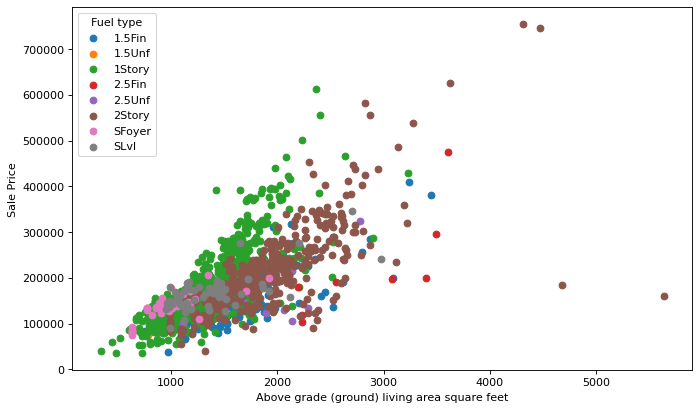

In [7]:
plt.figure(figsize=(10,6), dpi= 80)

for group_name, group in dataset[['SalePrice',  'GrLivArea','HouseStyle']].groupby('HouseStyle'):
    plt.scatter(group["GrLivArea"], group["SalePrice"], label=group_name)

plt.xlabel("Above grade (ground) living area square feet")
plt.ylabel("Sale Price")
plt.legend(loc='upper left', title='Fuel type')
plt.show()

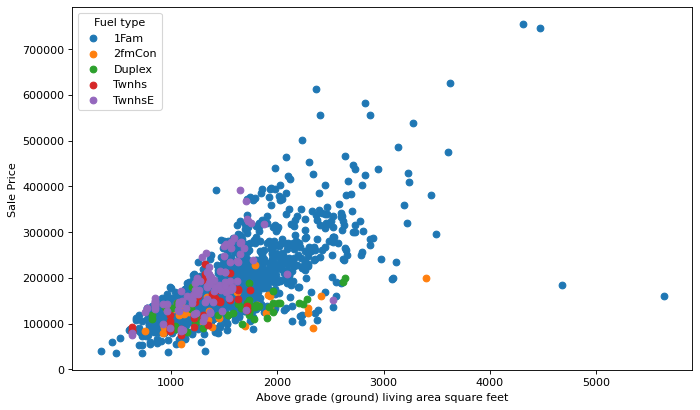

In [8]:
plt.figure(figsize=(10,6), dpi= 80)

for group_name, group in dataset[['SalePrice',  'GrLivArea','BldgType']].groupby('BldgType'):
    plt.scatter(group["GrLivArea"], group["SalePrice"], label=group_name)

plt.xlabel("Above grade (ground) living area square feet")
plt.ylabel("Sale Price")
plt.legend(loc='upper left', title='Fuel type')
plt.show()

<p>From the above analysis, we choose the following input features for the prediction</p>
<ul>
    <li>Continuous Features - GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF (since they have high correlations with the SalePrice)</li>
    <li>Categorical Features  - HouseStyle, BldgType (since their distributions are abundant in individual categories across various SalePrice values)</li>
</ul>

In [9]:
X = dataset[['TotalBsmtSF','GrLivArea','GarageCars','GarageArea','HouseStyle','BldgType']]
y = dataset['SalePrice']

<div style="height:20px;text-align_center"><hr/></div>

#### 3) Feature processing

<p style="margin-top:20px">Scaling continuous features</p>

In [10]:
standarized_TotalBsmtSF = standardize_column(X['TotalBsmtSF'])
X['TotalBsmtSF'].replace(standarized_TotalBsmtSF)

standarized_GrLivArea = standardize_column(X['GrLivArea'])
X['GrLivArea'].replace(standarized_GrLivArea)

standarized_GarageArea = standardize_column(X['GarageArea']) 
X['GarageArea'].replace(standarized_GarageArea)

Id
1       0.706586
2      -0.566038
3      -1.136847
4       0.828234
5      -0.173021
          ...   
1456   -0.566038
1457   -0.823370
1458    0.304213
1459   -1.183635
1460    0.931167
Name: GarageArea, Length: 1460, dtype: float64

<p style="margin-top:20px">Encoding categorical features</p>

In [11]:
X = pd.get_dummies(X, columns=['HouseStyle','BldgType'], prefix=['HouseStyle_is','BldgType_is'])

<div style="height:20px;text-align_center"><hr/></div>

#### 4) Model training

<p style="margin-top:20px">Splitting data in train and test</p>

In [12]:
X_train, X_val, y_train, y_val = split_train_test_data(X, y, 0.25)

In [13]:
reg_multiple = LinearRegression()
reg_multiple.fit(X_train, y_train)

LinearRegression()

#### 5) Model evaluation

In [14]:
y_pred = reg_multiple.predict(X_val)
compute_rmsle(y_val,y_pred)

0.28